In [2]:
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
df = load_wine(as_frame=True)
X=df.data
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
scaler=StandardScaler()
feature=scaler.fit_transform(X)
X_scaled=pd.DataFrame(feature)
X_scaled.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


In [5]:
x1=X_scaled.values

[2314.0000000000005, 1658.7588524290952, 1277.928488844642, 1175.7051928197118, 1115.9506732283137, 1075.3972131313208, 991.8286218053504, 939.6713570138011, 924.1465493069388]


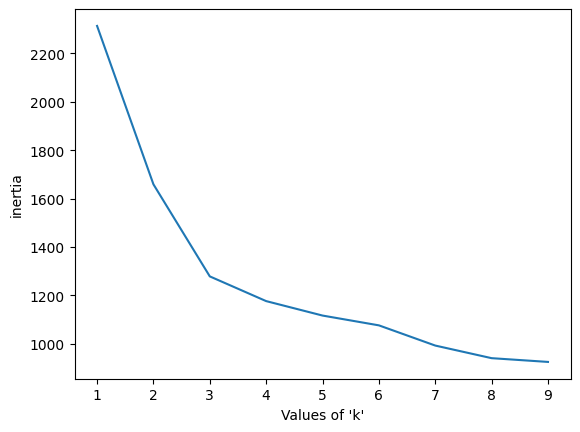

In [6]:
K_rng=range(1,10)
inertia=[]
for i in K_rng:
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x1)
    inertia.append(kmeans.inertia_)

print(inertia)
plt.plot(K_rng,inertia)
plt.xlabel("Values of 'k'")
plt.ylabel('inertia')
plt.show()



In [7]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(x1)

KMeans(n_clusters=3)

In [8]:
kmeans.cluster_centers_

array([[-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

In [9]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [10]:
pca=PCA(n_components=2)
reduced_x1=pd.DataFrame(data=pca.fit_transform(x1),columns=['PCA1','PCA2'])
reduced_x1.head()

,PCA1,PCA2
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


In [11]:
centers=pca.transform(kmeans.cluster_centers_)
centers

array([[-0.03695661, -1.77223945],
       [-2.72003575,  1.12565126],
       [ 2.2761936 ,  0.93205403]])

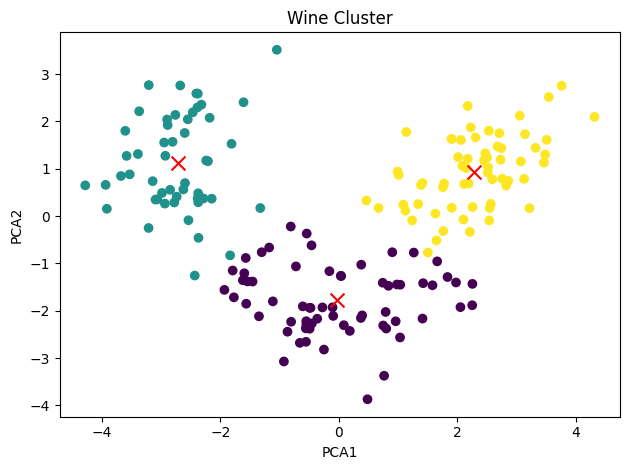

In [12]:
plt.scatter(reduced_x1['PCA1'],reduced_x1['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

In [13]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283]])

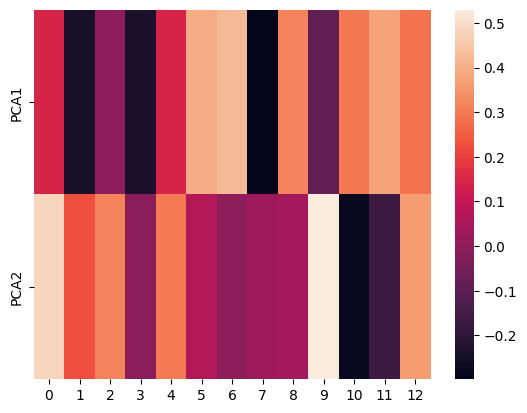

In [14]:
component_df=pd.DataFrame(pca.components_,['PCA1','PCA2'])
sns.heatmap(component_df)
plt.show()